In [128]:
# library
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import hangul_font
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.metrics import silhouette_score
from sklearn import preprocessing


In [131]:
# data
df = pd.read_excel("seoul_gu_sco_v2.xlsx")
df.head()
df.info()

df2 = pd.read_csv("동별_지수2.csv")
df2.head()
df2.info()

,result,시군구
0,9.192956,종로구
1,7.299337,중구
2,11.571015,용산구
3,9.307847,성동구
4,12.389070,광진구


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   result  25 non-null     float64
 1   시군구     25 non-null     object 
dtypes: float64(1), object(1)
memory usage: 528.0+ bytes


,시군구,행정동,최종지수
0,종로구,사직동,12.171837
1,종로구,삼청동,8.794331
2,종로구,부암동,11.909092
3,종로구,평창동,15.632887
4,종로구,무악동,10.954920


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     425 non-null    object 
 1   행정동     425 non-null    object 
 2   최종지수    425 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.1+ KB


In [132]:
data=pd.merge(df,df2,on="시군구")
data

,result,시군구,행정동,최종지수
0,9.192956,종로구,사직동,12.171837
1,9.192956,종로구,삼청동,8.794331
2,9.192956,종로구,부암동,11.909092
3,9.192956,종로구,평창동,15.632887
4,9.192956,종로구,무악동,10.954920
...,...,...,...,...
420,25.633619,강동구,둔촌1동,6.900000
421,25.633619,강동구,둔촌2동,18.653155
422,25.633619,강동구,암사1동,26.646641
423,25.633619,강동구,천호2동,27.124168


In [135]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.grid()
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

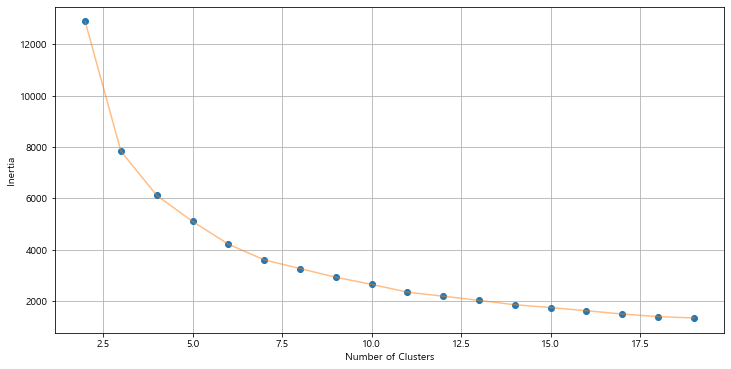

In [136]:
change_n_clusters(range(2,20), data.iloc[:,[0,3]])

In [137]:
df_clu=data.iloc[:,[0,3]]
df_clu

,result,최종지수
0,9.192956,12.171837
1,9.192956,8.794331
2,9.192956,11.909092
3,9.192956,15.632887
4,9.192956,10.954920
...,...,...
420,25.633619,6.900000
421,25.633619,18.653155
422,25.633619,26.646641
423,25.633619,27.124168


<IPython.core.display.Javascript object>

<Figure size 864x432 with 0 Axes>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='result', ylabel='최종지수'>

Text(0.5, 1.0, 'KMeans Clustering')

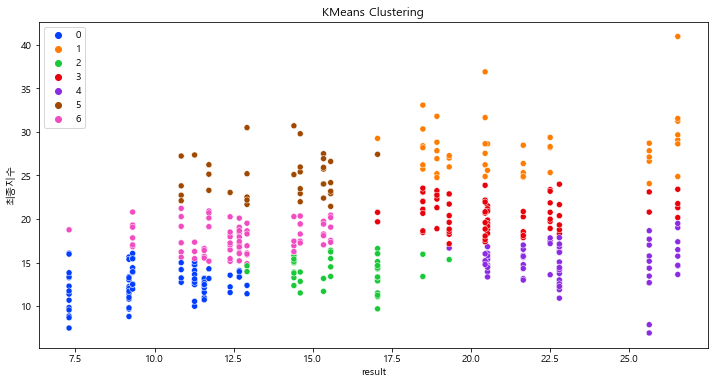

In [138]:
km = KMeans(n_clusters=7)

cluster = km.fit(df_clu)

cluster_id = pd.DataFrame(cluster.labels_)

d1 = pd.concat([df_clu, cluster_id], axis=1)

d1.columns = ["result", "최종지수", "labels"]
plt.figure(1 , figsize = (12, 6))
sns.scatterplot(d1["result"], d1["최종지수"], hue = d1['labels'], legend="full", palette="bright")

plt.title("KMeans Clustering")

plt.legend()
plt.show()

In [139]:
result1=pd.concat([d1,data[["행정동","시군구"]]],axis=1)
result1

,result,최종지수,labels,행정동,시군구
0,9.192956,12.171837,0,사직동,종로구
1,9.192956,8.794331,0,삼청동,종로구
2,9.192956,11.909092,0,부암동,종로구
3,9.192956,15.632887,0,평창동,종로구
4,9.192956,10.954920,0,무악동,종로구
...,...,...,...,...,...
420,25.633619,6.900000,4,둔촌1동,강동구
421,25.633619,18.653155,4,둔촌2동,강동구
422,25.633619,26.646641,1,암사1동,강동구
423,25.633619,27.124168,1,천호2동,강동구


In [141]:
result1["labels"].value_counts()

6    84
0    80
4    70
3    69
1    45
2    42
5    35
Name: labels, dtype: int64

In [142]:
pd.pivot_table(data=result1,index = 'labels',aggfunc='mean')

,result,최종지수
labels,,
0,10.044502,12.652374
1,21.674010,28.191430
2,15.975424,13.980128
3,20.847511,20.565894
4,22.975808,14.985206
5,13.871434,24.880188
6,12.620966,17.741102


In [143]:
result1[result1["labels"]==3]

,result,최종지수,labels,행정동,시군구
95,22.502530,21.854096,3,면목4동,중랑구
97,22.502530,19.713438,3,면목7동,중랑구
98,22.502530,19.984666,3,상봉1동,중랑구
102,22.502530,23.379482,3,묵1동,중랑구
104,22.502530,18.915109,3,망우3동,중랑구
...,...,...,...,...,...
389,22.794201,24.000085,3,오금동,송파구
392,22.794201,18.760948,3,석촌동,송파구
405,22.794201,19.315407,3,장지동,송파구
416,25.633619,23.109650,3,천호3동,강동구


In [144]:
df_clu

,result,최종지수
0,9.192956,12.171837
1,9.192956,8.794331
2,9.192956,11.909092
3,9.192956,15.632887
4,9.192956,10.954920
...,...,...
420,25.633619,6.900000
421,25.633619,18.653155
422,25.633619,26.646641
423,25.633619,27.124168


In [145]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(df_clu)
std_df = pd.DataFrame(standardScaler.transform(df_clu),columns=["result","최종지수"])
std_df

StandardScaler()

,result,최종지수
0,-1.386583,-1.106428
1,-1.386583,-1.735670
2,-1.386583,-1.155379
3,-1.386583,-0.461622
4,-1.386583,-1.333144
...,...,...
420,1.703536,-2.088591
421,1.703536,0.101065
422,1.703536,1.590280
423,1.703536,1.679245


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

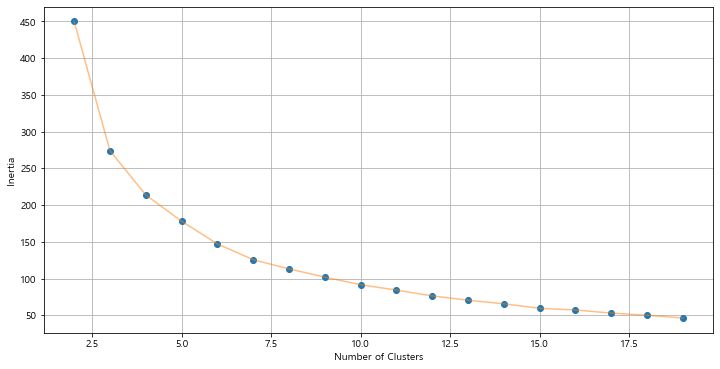

In [146]:
change_n_clusters(range(2,20), std_df)

<IPython.core.display.Javascript object>

<Figure size 864x432 with 0 Axes>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='result', ylabel='최종지수'>

Text(0.5, 1.0, 'KMeans Clustering')

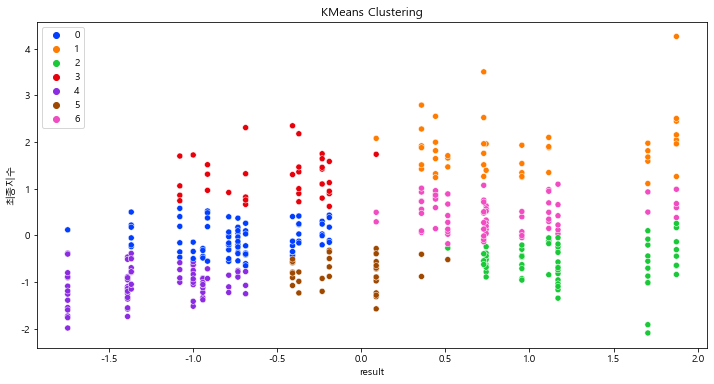

In [163]:
km = KMeans(n_clusters=7)

cluster = km.fit(std_df)

cluster_id = pd.DataFrame(cluster.labels_)

d1 = pd.concat([std_df, cluster_id], axis=1)

d1.columns = ["result", "최종지수", "labels"]
plt.figure(1 , figsize = (12, 6))
sns.scatterplot(d1["result"], d1["최종지수"], hue = d1['labels'], legend="full", palette="bright")

plt.title("KMeans Clustering")

plt.legend()
plt.show()

In [164]:
result2=pd.concat([d1,data[["행정동","시군구"]]],axis=1)
result2

,result,최종지수,labels,행정동,시군구
0,-1.386583,-1.106428,4,사직동,종로구
1,-1.386583,-1.735670,4,삼청동,종로구
2,-1.386583,-1.155379,4,부암동,종로구
3,-1.386583,-0.461622,4,평창동,종로구
4,-1.386583,-1.333144,4,무악동,종로구
...,...,...,...,...,...
420,1.703536,-2.088591,2,둔촌1동,강동구
421,1.703536,0.101065,2,둔촌2동,강동구
422,1.703536,1.590280,1,암사1동,강동구
423,1.703536,1.679245,1,천호2동,강동구


In [165]:
result2["labels"].value_counts()

pd.pivot_table(data=result2,index = 'labels',aggfunc='mean')

0    86
4    81
2    70
6    69
1    45
5    39
3    35
Name: labels, dtype: int64

,result,최종지수
labels,,
0,-0.737710,-0.079820
1,0.959305,1.878080
2,1.203985,-0.582288
3,-0.507236,1.261183
4,-1.219851,-1.013899
5,-0.074785,-0.781183
6,0.803959,0.457415


In [26]:
result2[result2["labels"]==1].to_excel("seoulclu.xlsx")

In [166]:
result2[result2["labels"]==1]

,result,최종지수,labels,행정동,시군구
101,1.115030,1.346866,1,중화2동,중랑구
105,1.115030,2.098733,1,신내1동,중랑구
107,1.115030,1.880243,1,면목본동,중랑구
109,1.115030,1.901186,1,망우본동,중랑구
128,0.743006,1.394970,1,종암동,성북구
129,0.743006,1.961496,1,석관동,성북구
131,0.442402,1.320840,1,번2동,강북구
132,0.442402,2.551155,1,번3동,강북구
136,0.442402,1.240030,1,삼양동,강북구
138,0.442402,1.644641,1,송중동,강북구
